In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['figure.figsize']=[12,8]
matplotlib.rcParams['font.size']=20

import medusa.chem.chem_lib as chem_lib
from medusa.chem.chem_lib import ISOTOPE_DATA
from medusa.const.const_lib import *

# chem Module

The chem module provides a simple interface to read isotope data and metal abundance files. In particular, the ISOTOPE_DATA variable contains a dictionary with masses (in AMU), atomic numbers and mass numbers of multiple isotopes.

In [3]:
ISOTOPE_DATA

{'ac227': {'am': 227.0277523, 'an': 89, 'mn': 227},
 'ag107': {'am': 106.9050916, 'an': 47, 'mn': 107},
 'ag109': {'am': 108.9047553, 'an': 47, 'mn': 109},
 'al27': {'am': 26.98153853, 'an': 13, 'mn': 27},
 'am241': {'am': 241.0568293, 'an': 95, 'mn': 241},
 'am243': {'am': 243.0613813, 'an': 95, 'mn': 243},
 'ar36': {'am': 35.967545105, 'an': 18, 'mn': 36},
 'ar38': {'am': 37.96273211, 'an': 18, 'mn': 38},
 'ar40': {'am': 39.9623831237, 'an': 18, 'mn': 40},
 'as75': {'am': 74.92159457, 'an': 33, 'mn': 75},
 'at210': {'am': 209.9871479, 'an': 85, 'mn': 210},
 'at211': {'am': 210.9874966, 'an': 85, 'mn': 211},
 'au197': {'am': 196.96656879, 'an': 79, 'mn': 197},
 'b10': {'am': 10.01293695, 'an': 5, 'mn': 10},
 'b11': {'am': 11.00930536, 'an': 5, 'mn': 11},
 'ba130': {'am': 129.9063207, 'an': 56, 'mn': 130},
 'ba132': {'am': 131.9050611, 'an': 56, 'mn': 132},
 'ba134': {'am': 133.90450818, 'an': 56, 'mn': 134},
 'ba135': {'am': 134.90568838, 'an': 56, 'mn': 135},
 'ba136': {'am': 135.904

using this information we can calculate the binding energy of an atom $\rm X$,

$$E_{\rm bind,X}=\left(M_{\rm X}-M_{\rm p}Z-M_{\rm n}(A-Z)\right)m_{\rm u}c^2$$

where $M_{\rm X}$, $M_{\rm p}$, $M_{\rm e}$ and $M_{\rm n}$ are the masses in amu of atom X,
a proton, an electron and a neutron, and $m_{\rm u}$ is the atomic mass unit. Plotting binding energy per nucleon
shows that it peaks for iron, indication that energy can only be produced through fusion up to
that point.

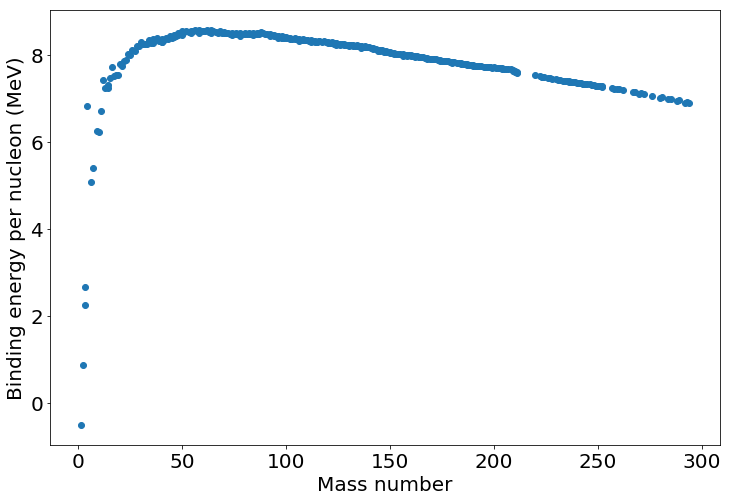

In [18]:
keys = ISOTOPE_DATA.keys()
atomic_nums = np.array([ISOTOPE_DATA[key]["an"] for key in keys])
atomic_masses = np.array([ISOTOPE_DATA[key]["am"] for key in keys])
mass_numbers = np.array([ISOTOPE_DATA[key]["mn"] for key in keys])

binding_energies = np.array([AMU*atomic_masses[i] - MP*atomic_nums[i] - MN*(mass_numbers[i]-atomic_nums[i])
                    for i in range(len(atomic_nums))])*CLIGHT**2/(1e6*EV2ERG)
plt.gca().set_xlabel("Mass number")
plt.gca().set_ylabel("Binding energy per nucleon (MeV)")

plt.scatter(mass_numbers,-binding_energies/mass_numbers)

plt.show()

An additional simple exercise is to estimate the lifetime of the sun,
given its mass and luminosity. Assuming a hydrogen mass fraction of $X=0.7$
at the zero age main sequence, and that through the main sequence the star burns
$10\%$ of its hydrogen into helium, the lifetime is approximately given by

$$t_{\rm MS}=\frac{XM_{\odot}(4M_{\rm p}+2M_{\rm e}-M_{\rm He})c^2}{4M_{\rm p}L_\odot}.$$

Let's calculate this.

In [30]:
0.1*0.7*MSUN*(4*MP+2*ME-ISOTOPE_DATA["he4"]["am"]*AMU)*CLIGHT**2/(4*MP*LSUN)/(1e9*SECYER)

7.071694610560818